Percentual de entregas:
Status
No Prazo    79.5
Atrasada    20.5
Name: proportion, dtype: float64
Tempo médio de atraso: 1.98 dias


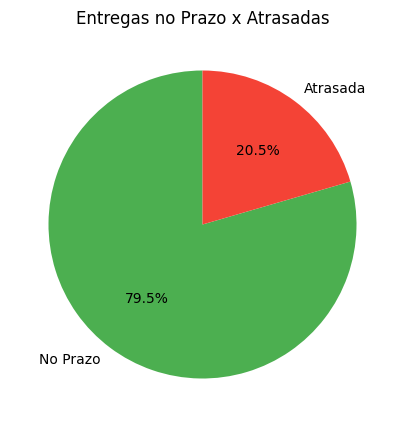

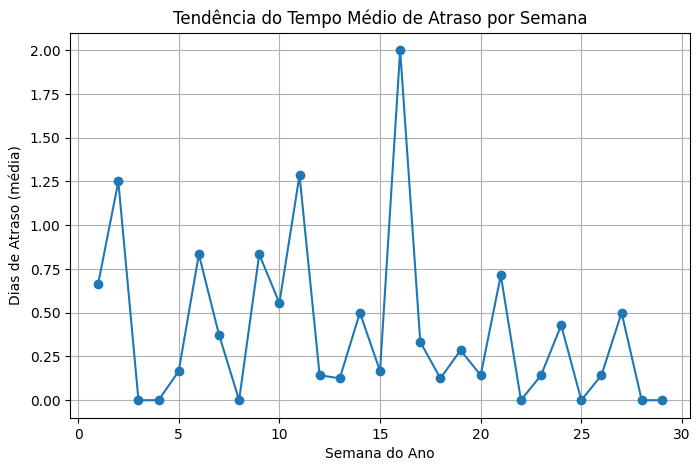

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Carregar dados
df = pd.read_csv("https://raw.githubusercontent.com/Vitor1213/portfolio-dados/refs/heads/main/Projeto%202%20%E2%80%93%20Analise%20de%20Atrasos%20Logisticos%20em%20Python/dados-ficticios-transportes.csv", parse_dates=["Data_Pedido","Data_Entrega_Prevista","Data_Entrega_Real"])

# 2. % entregas no prazo x atrasadas
percentuais = df["Status"].value_counts(normalize=True) * 100

# 3. Tempo médio de atraso (somente atrasadas)
tempo_medio_atraso = df.loc[df["Status"] == "Atrasada", "Dias_Atraso"].mean()

# 4. Tendência dos atrasos por semana
df["Semana"] = df["Data_Entrega_Real"].dt.isocalendar().week
atrasos_por_semana = df.groupby("Semana")["Dias_Atraso"].mean()

# --- Exibir resultados ---
print("Percentual de entregas:")
print(percentuais)
print(f"Tempo médio de atraso: {tempo_medio_atraso:.2f} dias")

# --- Gráfico 1: Pizza ---
plt.figure(figsize=(5,5))
plt.pie(percentuais, labels=percentuais.index, autopct='%1.1f%%', startangle=90, colors=["#4CAF50", "#F44336"])
plt.title("Entregas no Prazo x Atrasadas")
plt.show()

# --- Gráfico 2: Linha ---
plt.figure(figsize=(8,5))
plt.plot(atrasos_por_semana.index, atrasos_por_semana.values, marker="o")
plt.title("Tendência do Tempo Médio de Atraso por Semana")
plt.xlabel("Semana do Ano")
plt.ylabel("Dias de Atraso (média)")
plt.grid(True)
plt.show()
